In [1]:
import pandas as pd
import datetime as dt
from collections import Counter

In [2]:
fields = ['Time','User','Message']

df = pd.read_csv('chat_08_24.csv', usecols=fields, header=0)

In [3]:
df.head()

,Time,User,Message
0,2018-07-24 19:41:06,Bennett,asdf
1,2018-07-24 19:43:12,Lukie Pie,Agreed.
2,2018-07-25 02:24:36,Lukie Pie,We're live people!
3,2018-07-25 02:24:57,Lukie Pie,Welcome to the Season of Friendship!
4,2018-07-25 02:29:38,Dr_Pizza,I'm here


In [4]:
#Get top Contributers
df['User'].value_counts()

Lukie Pie                                 246
Benny                                      86
Dr_Pizza                                   80
Mandy Butts                                51
Bennett                                    45
Adro                                       36
Emily Adams                                29
Matt Gross                                  8
Lukeatuke                                   6
justjken                                    5
admin                                       5
Blake Silberberg                            5
alan wilk                                   4
Steve                                       4
David "something inscrutable" Goldfarb      2
David Goldfarb                              2
Nate Freeman                                2
Nova Hammerquist                            1
Emmy K                                      1
Erin Mathews                                1
Echter                                      1
Tristan Weber                     

In [5]:
#Get message counts by day of the week

#make Time into datetime
df['Time'] = pd.to_datetime(df['Time'])

#create day column
df['day'] = df['Time'].dt.weekday_name

#Get message counts by day of week
df['day'].value_counts()

Wednesday    432
Thursday      94
Friday        59
Tuesday       34
Monday         2
Saturday       1
Name: day, dtype: int64

In [6]:
#Get most popular word count

#create empty list
word_list = []

for item in df['Message']:
    word_list.extend(item.lower().split())

counts = Counter(word_list)
sorted(counts.items(), key=lambda x:-x[1])

[('the', 98),
 ('i', 72),
 ('is', 71),
 ('to', 67),
 ('you', 58),
 ('a', 42),
 ('it', 36),
 ('this', 34),
 ('we', 33),
 ('that', 33),
 ('in', 33),
 ('and', 29),
 ('on', 26),
 ('of', 24),
 ('lol', 24),
 ("it's", 22),
 ('but', 22),
 ('have', 21),
 ('so', 21),
 ('are', 19),
 ('can', 19),
 ('if', 18),
 ("i'm", 17),
 ('oh', 17),
 ('for', 16),
 ('not', 16),
 ('good', 16),
 ('like', 16),
 ('yeah', 15),
 ('also', 15),
 ('chat', 15),
 ('me', 14),
 ('at', 14),
 ('he', 14),
 ('swearing', 14),
 ('be', 13),
 ('one', 12),
 ('there', 12),
 ('some', 12),
 ('up', 12),
 ('just', 11),
 ('my', 11),
 ('no', 11),
 ('about', 11),
 ('hey', 11),
 ('here', 10),
 ("you're", 10),
 ('your', 10),
 ("that's", 10),
 ('get', 10),
 ('from', 9),
 ('should', 9),
 ('all', 9),
 ('people', 9),
 ('what', 9),
 ('did', 9),
 ('with', 9),
 ('her', 9),
 ('out', 8),
 ('was', 8),
 ('adro', 8),
 ('go', 8),
 ('where', 8),
 ('do', 8),
 ('think', 8),
 ('see', 7),
 ('ben', 7),
 ('gotta', 7),
 ('or', 7),
 ('still', 7),
 ('an', 7),
 ('the

In [7]:
useless=['the','i','is','to','you','a','it','this','we','that','in','and','on','of',"it's",'but','have','so', 'are',
        'can','if',"i'm",'oh','for','not','like','also','me','at','he','be','one','there','some','just','my','no',
        'about','hey','here',"you're",'your',"that's",'get','from','should','what','did','with','out','was','go',
        'where','do','or','an','as','keep','too','src-org="_"]',"i'll", "can't"]
d = dict(counts)
for item in useless:
    d.pop(item)
sorted(counts.items(), key=lambda x:-x[1])

[('the', 98),
 ('i', 72),
 ('is', 71),
 ('to', 67),
 ('you', 58),
 ('a', 42),
 ('it', 36),
 ('this', 34),
 ('we', 33),
 ('that', 33),
 ('in', 33),
 ('and', 29),
 ('on', 26),
 ('of', 24),
 ('lol', 24),
 ("it's", 22),
 ('but', 22),
 ('have', 21),
 ('so', 21),
 ('are', 19),
 ('can', 19),
 ('if', 18),
 ("i'm", 17),
 ('oh', 17),
 ('for', 16),
 ('not', 16),
 ('good', 16),
 ('like', 16),
 ('yeah', 15),
 ('also', 15),
 ('chat', 15),
 ('me', 14),
 ('at', 14),
 ('he', 14),
 ('swearing', 14),
 ('be', 13),
 ('one', 12),
 ('there', 12),
 ('some', 12),
 ('up', 12),
 ('just', 11),
 ('my', 11),
 ('no', 11),
 ('about', 11),
 ('hey', 11),
 ('here', 10),
 ("you're", 10),
 ('your', 10),
 ("that's", 10),
 ('get', 10),
 ('from', 9),
 ('should', 9),
 ('all', 9),
 ('people', 9),
 ('what', 9),
 ('did', 9),
 ('with', 9),
 ('her', 9),
 ('out', 8),
 ('was', 8),
 ('adro', 8),
 ('go', 8),
 ('where', 8),
 ('do', 8),
 ('think', 8),
 ('see', 7),
 ('ben', 7),
 ('gotta', 7),
 ('or', 7),
 ('still', 7),
 ('an', 7),
 ('the

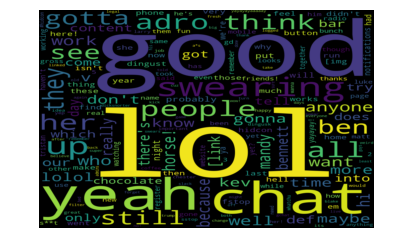

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

useless=['the','i','is','to','you','a','it','this','we','that','in','and','on','of',"it's",'but','have','so', 'are',
        'can','if',"i'm",'oh','for','not','like','also','me','at','he','be','one','there','some','just','my','no',
        'about','hey','here',"you're",'your',"that's",'get','from','should','what','did','with','out','was','go',
        'where','do','or','an','as','keep','too','src-org="_"]',"i'll", "can't"]
d = dict(counts)
for item in useless:
    d.pop(item)

wordcloud = WordCloud(width=1000,height=1000)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear",aspect='auto')
plt.axis("off")
plt.show()

In [42]:
def chat_wordcloud(filename):

	fields = ['Time','User','Message']

	df = pd.read_csv(filename, usecols=fields, header=0)

	#create empty list
	word_list = []

	for item in df['Message']:
	    word_list.extend(item.lower().split())

	counts = Counter(word_list)
	sorted(counts.items(), key=lambda x:-x[1])

	#words we don't care about
	useless=['the','i','is','to','you','a','it','this','we','that','in','and','on','of',"it's",'but','have','so', 'are',
		'can','if',"i'm",'oh','for','not','like','also','me','at','he','be','one','there','some','just','my','no',
		'about','hey','here',"you're",'your',"that's",'get','from','should','what','did','with','out','was','go',
		'where','do','or','an','as','keep','too','src-org="_"]',"[link","i'll", "can't"]
	#create word/count pairs
	d = dict(counts)
	for item in useless:
	    d.pop(item)
	
	#plot wordcloud based on word/count pairs
	wordcloud = WordCloud(width=1000,height=1000)
	wordcloud.generate_from_frequencies(frequencies=d)
	plt.figure(figsize=(10,20))
	plt.imshow(wordcloud, interpolation="bilinear")
	plt.axis("off")
	plt.show()


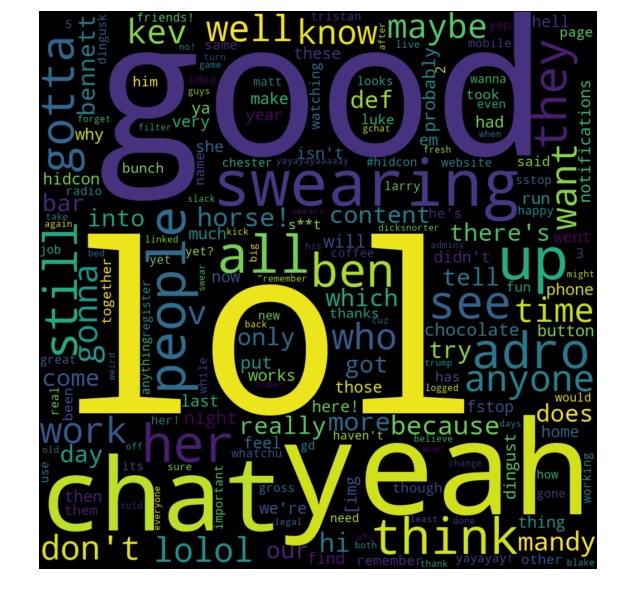

In [43]:
chat_wordcloud('chat_08_24.csv')